In [ ]:
!pip install requests
!pip install beautifulsoup4

In [ ]:
!pip install brotli


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 22.3 MB/s eta 0:00:00


In [ ]:
import requests
import brotli
from bs4 import BeautifulSoup as bs

In [ ]:
domain = "https://www.wikipedia.org"
query = "wiki"
URL = f"{domain}/{query}"

response = requests.get(URL)
if response.status_code == 200:
    print("Successfully fetched webpage!")
else:
    print("Failed to fetch the webpage. Status code:", response.status_code)

Successfully fetched webpage!


In [ ]:
# Create a BeautifulSoup object and extract specific content from the HTML page.
soup = bs(response.content, 'html.parser')

# Pretty print the HTML content
print(soup.body.prettify()) # soup.body.prettify() also works

<body class="skin--responsive skin-vector skin-vector-search-vue mediawiki ltr sitedir-ltr mw-hide-empty-elt ns-0 ns-subject page-Main_Page rootpage-Main_Page skin-vector-2022 action-view">
 <a class="mw-jump-link" href="#bodyContent">
  Jump to content
 </a>
 <div class="vector-header-container">
  <header class="vector-header mw-header">
   <div class="vector-header-start">
    <nav aria-label="Site" class="vector-main-menu-landmark">
     <div class="vector-dropdown vector-main-menu-dropdown vector-button-flush-left vector-button-flush-right" id="vector-main-menu-dropdown" title="Main menu">
      <input aria-haspopup="true" aria-label="Main menu" class="vector-dropdown-checkbox" data-event-name="ui.dropdown-vector-main-menu-dropdown" id="vector-main-menu-dropdown-checkbox" role="button" type="checkbox"/>
      <label aria-hidden="true" class="vector-dropdown-label cdx-button cdx-button--fake-button cdx-button--fake-button--enabled cdx-button--weight-quiet cdx-button--icon-only" for

In [ ]:
links = soup.find_all("a")
links = [link['href'] for link in links if 'href' in link.attrs]
links

['#bodyContent',
 '/wiki/Main_Page',
 '/wiki/Wikipedia:Contents',
 '/wiki/Portal:Current_events',
 '/wiki/Special:Random',
 '/wiki/Wikipedia:About',
 '//en.wikipedia.org/wiki/Wikipedia:Contact_us',
 '/wiki/Help:Contents',
 '/wiki/Help:Introduction',
 '/wiki/Wikipedia:Community_portal',
 '/wiki/Special:RecentChanges',
 '/wiki/Wikipedia:File_upload_wizard',
 '/wiki/Main_Page',
 '/wiki/Special:Search',
 'https://donate.wikimedia.org/?wmf_source=donate&wmf_medium=sidebar&wmf_campaign=en.wikipedia.org&uselang=en',
 '/w/index.php?title=Special:CreateAccount&returnto=Main+Page',
 '/w/index.php?title=Special:UserLogin&returnto=Main+Page',
 'https://donate.wikimedia.org/?wmf_source=donate&wmf_medium=sidebar&wmf_campaign=en.wikipedia.org&uselang=en',
 '/w/index.php?title=Special:CreateAccount&returnto=Main+Page',
 '/w/index.php?title=Special:UserLogin&returnto=Main+Page',
 '/wiki/Help:Introduction',
 '/wiki/Special:MyContributions',
 '/wiki/Special:MyTalk',
 '/wiki/Main_Page',
 '/wiki/Talk:Main_

In [ ]:
# Filter out links that are not in the 'en.wikipedia.org' domain and exclude certain domains
english_links = [link for link in links if ('wikipedia.org' not in link and "https://" in link) or ("en.wikipedia.org" in link and "https://" in link)]
english_links = list(set(english_links))
english_links

['https://en.wikisource.org/wiki/',
 'https://wikimania.wikimedia.org/wiki/Wikimania',
 'https://meta.wikimedia.org/wiki/Main_Page',
 'https://species.wikimedia.org/wiki/Main_Page',
 'https://www.wikidata.org/wiki/Wikidata:Main_Page',
 'https://en.wikiquote.org/wiki/',
 'https://meta.wikimedia.org/wiki/',
 'https://en.wikibooks.org/wiki/',
 'https://wikimediafoundation.org/our-work/wikimedia-projects/',
 'https://commons.wikimedia.org/wiki/Main_Page',
 'https://species.wikimedia.org/wiki/',
 'https://commons.wikimedia.org/wiki/',
 'https://en.wiktionary.org/wiki/Wiktionary:Main_Page',
 'https://donate.wikimedia.org/?wmf_source=donate&wmf_medium=sidebar&wmf_campaign=en.wikipedia.org&uselang=en',
 'https://foundation.wikimedia.org/wiki/Special:MyLanguage/Policy:Cookie_statement',
 'https://www.wikifunctions.org/wiki/Wikifunctions:Main_Page',
 'https://en.wikiversity.org/wiki/',
 'https://en.wikiversity.org/wiki/Wikiversity:Main_Page',
 'https://www.mediawiki.org/wiki/',
 'https://develop

In [ ]:
# Visit each link and extract details
data = []

for link in english_links:
    try:
        response = requests.get(link)
        soup = bs(response.content, 'html.parser')

        # Extract title
        title = soup.find('title').get_text(strip=True) if soup.find('title') else "No Title"

        # Extract page text
        text = soup.get_text(separator=' ', strip=True)

        # Append to data
        data.append([title, link, text])
        print(f"Scraped: {title} | URL: {link}")
    except Exception as e:
        print(f"Error scraping {link}: {e}")

Scraped: Wikisource, the free library | URL: https://en.wikisource.org/wiki/
Scraped: 2025:Wikimania - Wikimania | URL: https://wikimania.wikimedia.org/wiki/Wikimania
Scraped: Main Page - Meta | URL: https://meta.wikimedia.org/wiki/Main_Page
Scraped: Wikispecies, free species directory | URL: https://species.wikimedia.org/wiki/Main_Page
Scraped: Wikidata | URL: https://www.wikidata.org/wiki/Wikidata:Main_Page
Scraped: Wikiquote | URL: https://en.wikiquote.org/wiki/
Scraped: Main Page - Meta | URL: https://meta.wikimedia.org/wiki/
Scraped: Wikibooks | URL: https://en.wikibooks.org/wiki/
Scraped: Wikimedia Projects – Wikimedia Foundation | URL: https://wikimediafoundation.org/our-work/wikimedia-projects/
Scraped: Wikimedia Commons | URL: https://commons.wikimedia.org/wiki/Main_Page
Scraped: Wikispecies, free species directory | URL: https://species.wikimedia.org/wiki/
Scraped: Wikimedia Commons | URL: https://commons.wikimedia.org/wiki/
Scraped: Wiktionary, the free dictionary | URL: htt

In [ ]:
import textwrap

text = data[0][2]
wrapped_text = textwrap.fill(text, width=150)  # Adjust 'width' as per your preference
print(wrapped_text)

Wikisource, the free library Jump to content Main menu Main menu move to sidebar hide Navigation Main Page Community portal Central discussion Recent
changes Subject index Authors Random work Random author Random transcription Help Display Options Search Search Appearance Donate Create account Log
in Personal tools Donate Create account Log in Pages for logged out editors learn more Contributions Talk Main Page Main Page Discussion English Read
View source View history Tools Tools move to sidebar hide Actions Read View source View history General What links here Related changes Special pages
Permanent link Page information Cite this page Get shortened URL Download QR code Print/export Download as PDF Printable version In other projects
Wikimedia Commons Wikimedia Foundation MediaWiki Meta-Wiki Wikimedia Outreach Multilingual Wikisource Wikispecies Wikibooks Wikidata Wikifunctions
Wikimania Wikinews Wikipedia Wikiquote Wikiversity Wikivoyage Wiktionary Wikidata item Appearance move to s

In [ ]:
!pip install nltk


In [ ]:
import re
import nltk
from nltk.corpus import stopwords

# Download stop words from NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(raw_text):
    # Remove HTML tags
    clean_text = re.sub(r'<.*?>', '', raw_text)

    # Remove special characters and numbers
    clean_text = re.sub(r'[^a-zA-Z\s]', '', clean_text)

    # Convert to lowercase
    clean_text = clean_text.lower()

    # Tokenize and remove stop words
    words = clean_text.split()
    words = [word for word in words if word not in stop_words]

    # Join the cleaned words back into a single string
    clean_text = ' '.join(words)

    return clean_text

# Apply the cleaning function to the scraped text
for entry in data:
    entry[2] = clean_text(entry[2])

# Print a cleaned version of the first entry's text
print(textwrap.fill(data[0][2], width=150))


[nltk_data] Downloading package stopwords to /root/nltk_data...


wikisource free library jump content main menu main menu move sidebar hide navigation main page community portal central discussion recent changes
subject index authors random work random author random transcription help display options search search appearance donate create account log personal
tools donate create account log pages logged editors learn contributions talk main page main page discussion english read view source view history
tools tools move sidebar hide actions read view source view history general links related changes special pages permanent link page information cite
page get shortened url download qr code printexport download pdf printable version projects wikimedia commons wikimedia foundation mediawiki metawiki
wikimedia outreach multilingual wikisource wikispecies wikibooks wikidata wikifunctions wikimania wikinews wikipedia wikiquote wikiversity wikivoyage
wiktionary wikidata item appearance move sidebar hide wikisource welcome wikisource free library anyone imp

[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import spacy

# Load the English language model in spaCy
nlp = spacy.load('en_core_web_sm')

# Process the text
doc = nlp(entry[2])

# Get sentences and words
sentences = [sent.text for sent in doc.sents]
words = [token.text for token in doc]

# Print the results
print("Sentences:", sentences)
print("Words:", words)


Sentences: ['wikisource free library jump content main menu main menu move sidebar hide navigation main page community portal central discussion recent changes subject index authors random work random author random transcription help display options search search appearance donate create account log personal tools donate create account log pages logged editors learn contributions talk main page main page discussion english read view source view history tools tools move sidebar hide actions read view source view history general links related changes special pages permanent link page information cite page get shortened url download qr code printexport download pdf printable version projects wikimedia commons wikimedia foundation mediawiki metawiki wikimedia outreach multilingual wikisource wikispecies wikibooks wikidata wikifunctions wikimania wikinews wikipedia wikiquote wikiversity wikivoyage wiktionary wikidata item appearance move sidebar hide wikisource welcome wikisource free libra

In [ ]:
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Process the text (replace `entry[2]` with your actual text)
text = entry[2]  # Assuming entry[2] contains the text to process
doc = nlp(text)

# Apply lemmatization to each word and filter out stop words and punctuation
lemmatized_words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

# Print the lemmatized words
print("Lemmatized Words:", lemmatized_words)


Lemmatized Words: ['wikisource', 'free', 'library', 'jump', 'content', 'main', 'menu', 'main', 'menu', 'sidebar', 'hide', 'navigation', 'main', 'page', 'community', 'portal', 'central', 'discussion', 'recent', 'change', 'subject', 'index', 'author', 'random', 'work', 'random', 'author', 'random', 'transcription', 'help', 'display', 'option', 'search', 'search', 'appearance', 'donate', 'create', 'account', 'log', 'personal', 'tool', 'donate', 'create', 'account', 'log', 'page', 'log', 'editor', 'learn', 'contribution', 'talk', 'main', 'page', 'main', 'page', 'discussion', 'english', 'read', 'view', 'source', 'view', 'history', 'tool', 'tool', 'sidebar', 'hide', 'action', 'read', 'view', 'source', 'view', 'history', 'general', 'link', 'relate', 'change', 'special', 'page', 'permanent', 'link', 'page', 'information', 'cite', 'page', 'shorten', 'url', 'download', 'qr', 'code', 'printexport', 'download', 'pdf', 'printable', 'version', 'project', 'wikimedia', 'commons', 'wikimedia', 'foundat

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np


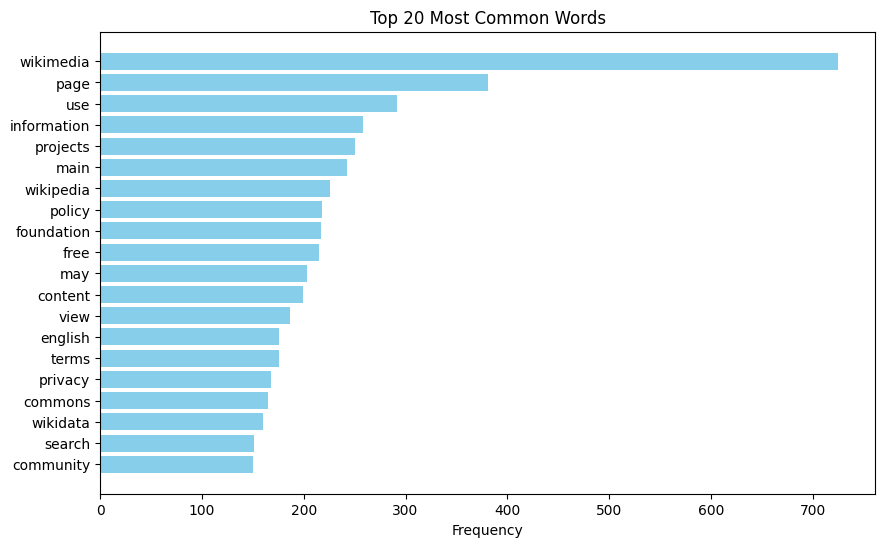

In [ ]:
# Flatten all the cleaned words into one list for analysis
all_words = []
for entry in data:
    all_words.extend(entry[2].split())  # Entry[2] contains the cleaned text

# Step 1: Word Frequency Analysis
word_counts = Counter(all_words)

# Get the most common words
most_common_words = word_counts.most_common(20)  # Top 20 most common words

# Step 2: Visualization - Bar chart of word frequencies
word_labels, word_freqs = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.barh(word_labels, word_freqs, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the most common word on top
plt.show()


In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(sentence_lengths, kde=True, color='green', bins=30)
plt.xlabel('Sentence Length')
plt.title('Distribution of Sentence Lengths')
plt.show()



NameError: name 'sentence_lengths' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:

# Step 4: Additional Statistics
# Average word length
avg_word_length = np.mean([len(word) for word in all_words])
print(f'Average Word Length: {avg_word_length:.2f}')

# Number of unique words
unique_words = len(set(all_words))
print(f'Number of Unique Words: {unique_words}')

# Lexical Diversity
lexical_diversity = unique_words / len(all_words) if len(all_words) > 0 else 0
print(f'Lexical Diversity: {lexical_diversity:.4f}')

# Optional: Show some other interesting statistics
# Most frequent word length
most_frequent_word_length = Counter([len(word) for word in all_words]).most_common(1)[0]
print(f'Most Frequent Word Length: {most_frequent_word_length[0]} (appears {most_frequent_word_length[1]} times)')

# Total number of words in dataset
total_words = len(all_words)
print(f'Total Number of Words: {total_words}')


Average Word Length: 6.95
Number of Unique Words: 7131
Lexical Diversity: 0.1749
Most Frequent Word Length: 7 (appears 6135 times)
Total Number of Words: 40780


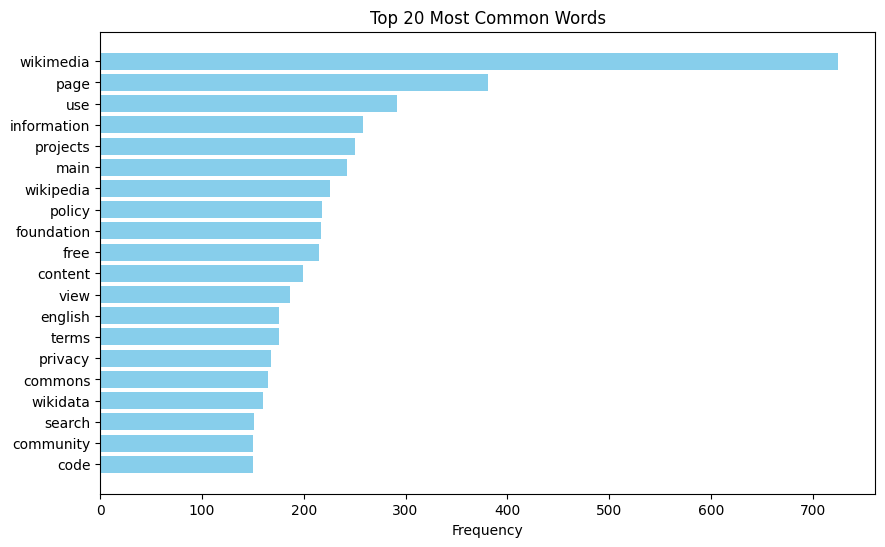

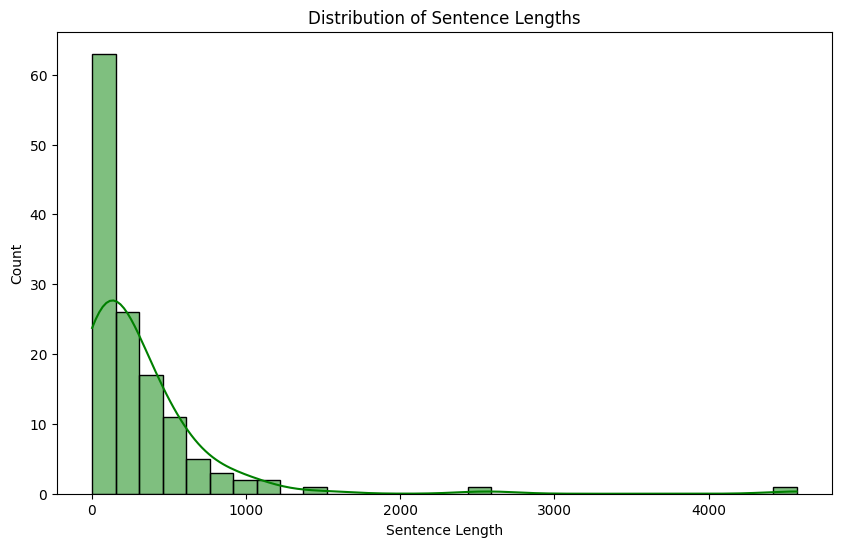

Average Word Length: 7.09
Number of Unique Words: 7000
Lexical Diversity: 0.1811
Most Frequent Word Length: 7 (appears 5992 times)
Total Number of Words: 38651


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import spacy

# Load the English language model in spaCy
nlp = spacy.load('en_core_web_sm')

# Flatten all the cleaned words into one list for analysis
all_words = []
sentence_lengths = []

# Tokenize each entry and track sentence lengths
for entry in data:
    cleaned_text = entry[2]  # Assuming entry[2] contains the cleaned text
    doc = nlp(cleaned_text)  # Process text with spaCy

    # Extract words
    all_words.extend([token.text for token in doc if not token.is_stop and not token.is_punct])

    # Extract sentence lengths
    sentence_lengths.extend([len(sent.text.split()) for sent in doc.sents])  # Sentence length in words

# Step 1: Word Frequency Analysis
word_counts = Counter(all_words)

# Get the most common words
most_common_words = word_counts.most_common(20)  # Top 20 most common words

# Step 2: Visualization - Bar chart of word frequencies
word_labels, word_freqs = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.barh(word_labels, word_freqs, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the most common word on top
plt.show()

# Step 3: Distribution plot of sentence lengths
plt.figure(figsize=(10, 6))
sns.histplot(sentence_lengths, kde=True, color='green', bins=30)
plt.xlabel('Sentence Length')
plt.title('Distribution of Sentence Lengths')
plt.show()

# Step 4: Additional Statistics
# Average word length
avg_word_length = np.mean([len(word) for word in all_words])
print(f'Average Word Length: {avg_word_length:.2f}')

# Number of unique words
unique_words = len(set(all_words))
print(f'Number of Unique Words: {unique_words}')

# Lexical Diversity
lexical_diversity = unique_words / len(all_words) if len(all_words) > 0 else 0
print(f'Lexical Diversity: {lexical_diversity:.4f}')

# Optional: Show some other interesting statistics
# Most frequent word length
most_frequent_word_length = Counter([len(word) for word in all_words]).most_common(1)[0]
print(f'Most Frequent Word Length: {most_frequent_word_length[0]} (appears {most_frequent_word_length[1]} times)')

# Total number of words in dataset
total_words = len(all_words)
print(f'Total Number of Words: {total_words}')
